In [1]:
#import ROOT
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
import melp
#from melp import TileAnalyzer
#import melp

Welcome to JupyROOT 6.24/06


In [2]:
#test = melp.TileHitAngle("sorted_truth.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
mu3e_detector = Detector.initFromROOT("soted_test.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector geometry loaded

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:
melp.select(mu3e_detector)


In [7]:
print(mu3e_detector)

Detector(TileDetector=<melp.src.tile.TileDetector object at 0x7fe86d47a1c0>, SensorModules=<melp.src.sensor.SensorModule object at 0x7fe86b67bd60>))


In [8]:
melp.addTileHits("soted_test.root", truth=True, traj=True)

In [9]:
mu3e_detector.TileDetector.tile[200000].hits[2].trajectory


Trajectory(id=1060280, v_pos=[-5.804268016183967, -4.464733862084155, -30.762696605449502], v_dir=[-28.793049659769032, -9.556355447894425, -29.032859913399918], traj_type=11)

In [10]:
mu3e_detector.TileDetector.tile[200000].id



200000

In [11]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [20]
  - Loaded Runs (Pixel):  []
------------------------------


In [12]:
melp.getHitRate()

[[0,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -566.915,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,
  -560.505,

In [13]:
melp.addSensorHits("soted_test.root", traj=True)

In [14]:
hitangle = melp.getHitAngle(rec_type="Truth")

In [15]:
print(hitangle[1])

[0.0, -18.886037131334774, -26.48740359195531, -23.85668788302727, -52.935626507596375, -68.13519235482528, 151.87313263482017, -44.67964129743984, -52.7024377377186, -26.549754906809135, -31.005495193286, -103.98969646285559, 164.31445277503602, -14.780078792536042, -25.23047934001501, 20.456511232114536, -11.088288827819127, -28.24509979118715, -150.72356788610924, -54.350447643334434, -44.20350132220458, -15.437924864223795, 170.4457066635118, -67.63133431072856, -15.713158646944965, -116.07565976307313, -4.499382828596539, -26.738625455439177, -129.5746019002018, -50.21678629319619, -13.840025225725592, -89.42224222085152, -9.199470744809377, -25.948989116482217, 161.62834728042688, -22.41232686025668, -30.367646474461676, -162.53260582499453, -1.205050581225902, 152.70933932743807, -160.5361773531965, -9.245781814259432, -18.51965778659102, -16.724464625498275, -45.37103813717359, -10.99862666455256, -9.17254301673933, -90.58030110891806, -54.44078563853053, -155.31079572406665, -

In [16]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [20]
  - Loaded Runs (Pixel):  [20]
------------------------------


In [17]:
mu3e_detector.SensorsModules.sensor[1].hit


[Hit(edep=0, mc_i=0, tid=41717, frame_id=11, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 22.9806888 ,   4.86462651, -43.39      ])),
 Hit(edep=0, mc_i=0, tid=11660, frame_id=25, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 18.60279034,  15.43380837, -44.43      ])),
 Hit(edep=0, mc_i=0, tid=38211, frame_id=28, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 20.01106537,  12.03393169, -43.47      ])),
 Hit(edep=0, mc_i=0, tid=40243, frame_id=33, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 21.75610182,   7.82104102, -47.95      ])),
 Hit(edep=0, mc_i=0, tid=47808, frame_id=38, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 19.06201046,  14.32515293, -55.47      ])),
 Hit(edep=0, mc_i=0, tid=3655, frame_id=39, run_id=-1, hid=0, impact_vec=None, trajectory=None, pos=array([ 18.38848762,  15.9511809 , -57.07      ])),
 Hit(edep=0, mc_i=0, tid=45721, frame_id=40, run_id=-1, hid=0, impact_vec=None, tra

In [18]:
mu3e_detector.TileDetector.tile[200000].hits

[Hit(edep=0.37519922327841315, mc_i=156600, tid=-1, frame_id=249, run_id=-1, hid=1, impact_vec=[-40.7664160564687, 13.946365564545854, -26.58356159761339], trajectory=Trajectory(id=201059, v_pos=[1.4974067675276979, -3.7302768856119344, -39.446056577010594], v_dir=[-41.30326736635199, -4.489170671647443, -30.00009525387438], traj_type=11), pos=None),
 Hit(edep=0.5774704077273539, mc_i=466749, tid=-1, frame_id=740, run_id=-1, hid=9, impact_vec=[1.2314638200321468, -1.6460727728609297, -1.729906061367066], trajectory=Trajectory(id=558789, v_pos=[55.671688734841275, -4.3922275752522895, -563.2672214768197], v_dir=[1.219908676081068, 1.3530668140142326, -5.718504443438011], traj_type=52), pos=None),
 Hit(edep=0.7719337043235552, mc_i=905529, tid=-1, frame_id=1437, run_id=-1, hid=1, impact_vec=[-26.223785765741447, 13.067499646373888, -29.149748237241592], trajectory=Trajectory(id=1060280, v_pos=[-5.804268016183967, -4.464733862084155, -30.762696605449502], v_dir=[-28.793049659769032, -9.55

In [19]:
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

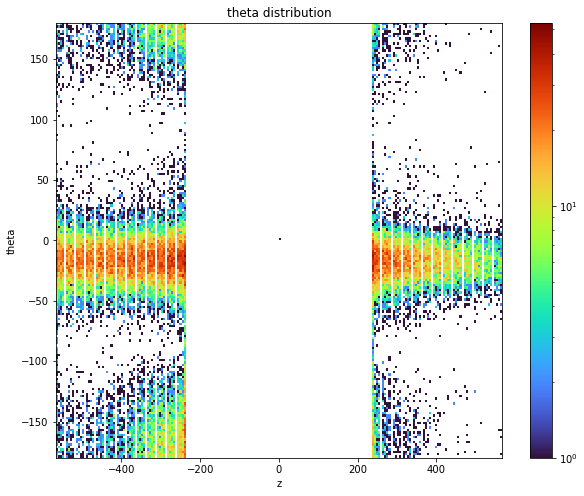

In [20]:
import numpy as np

fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()